In [1]:
import pandas as pd
import re
import datetime
import seaborn as sns
import sqlite3
import os
import numpy as np
import nbformat
import matplotlib.pyplot as plt
import plotly.tools as tools
import plotly.figure_factory as ff
import plotly.express as px
import ast
import json
from sklearn.preprocessing import OneHotEncoder
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression


In [2]:
df_games = pd.read_csv(r'f:\LPI lessons\Data science\project\pop2\backloggd_games.csv', encoding='latin1')
df_games

,Unnamed: 0,Title,Release_Date,Developers,Summary,Platforms,Genres,Rating,Plays,Playing,Backlogs,Wishlist,Lists,Reviews
0,0,Elden Ring,"Feb 25, 2022","['FromSoftware', 'Bandai Namco Entertainment']","Elden Ring is a fantasy, action and open world...","['Windows PC', 'PlayStation 4', 'Xbox One', 'P...","['Adventure', 'RPG']",4.5,21K,4.1K,5.6K,5.5K,4.6K,3K
1,1,The Legend of Zelda: Breath of the Wild,"Mar 03, 2017","['Nintendo', 'Nintendo EPD Production Group No...",The Legend of Zelda: Breath of the Wild is the...,"['Wii U', 'Nintendo Switch']","['Adventure', 'Puzzle']",4.4,35K,3.1K,5.6K,3K,5.1K,3K
2,2,Hades,"Dec 07, 2018",['Supergiant Games'],A rogue-lite hack and slash dungeon crawler in...,"['Windows PC', 'Mac', 'PlayStation 4', 'Xbox O...","['Adventure', 'Brawler', 'Indie', 'RPG']",4.3,25K,3.5K,7.3K,4K,3.2K,2.1K
3,3,Hollow Knight,"Feb 24, 2017",['Team Cherry'],A 2D metroidvania with an emphasis on close co...,"['Windows PC', 'Mac', 'Linux', 'Nintendo Switch']","['Adventure', 'Indie', 'Platform']",4.4,25K,2.7K,9.6K,2.6K,3.4K,2.1K
4,4,Undertale,"Sep 15, 2015","['tobyfox', '8-4']","A small child falls into the Underground, wher...","['Windows PC', 'Mac', 'Linux', 'PlayStation 4'...","['Adventure', 'Indie', 'RPG', 'Turn Based Stra...",4.2,32K,728,5.7K,2.1K,3.9K,2.5K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,59995,Dragon Spirits,"Apr 25, 2023","['FHNBHJ', 'indienova']",While constantly working on a video game witho...,['Windows PC'],['RPG'],NaN,2,0,1,5,3,0
59996,59996,Pathfinder: Kingmaker - Definitive Edition,"Aug 18, 2020","['Owlcat Games', 'Deep Silver']",The Definitive Edition will have all of the DL...,"['PlayStation 4', 'Xbox One']","['RPG', 'Tactical']",3.7,9,0,19,1,7,1
59997,59997,Sainth,"Apr 11, 2008",['Neo Kuriyo'],"Years after the events of ""Wraith"", a young gi...",['Windows PC'],[],NaN,1,0,0,2,0,0
59998,59998,Dragon Spirits,"Apr 25, 2023","['FHNBHJ', 'indienova']",While constantly working on a video game witho...,['Windows PC'],['RPG'],NaN,2,0,1,5,3,0


In [3]:
df_games.drop(columns=['Unnamed: 0'],axis=1,inplace=True)

In [5]:
df_games.isna().sum()

Title               0
Release_Date        0
Developers          0
Summary          4954
Platforms           0
Genres              0
Rating          34595
Plays               0
Playing             0
Backlogs            0
Wishlist            0
Lists               0
Reviews             0
dtype: int64

In [4]:
df_games_cleaned=df_games.fillna('unknown')
df_games_cleaned.isna().sum()

Title           0
Release_Date    0
Developers      0
Summary         0
Platforms       0
Genres          0
Rating          0
Plays           0
Playing         0
Backlogs        0
Wishlist        0
Lists           0
Reviews         0
dtype: int64

In [5]:
df_games_cleaned.drop_duplicates(inplace=True)
df_games_cleaned

,Title,Release_Date,Developers,Summary,Platforms,Genres,Rating,Plays,Playing,Backlogs,Wishlist,Lists,Reviews
0,Elden Ring,"Feb 25, 2022","['FromSoftware', 'Bandai Namco Entertainment']","Elden Ring is a fantasy, action and open world...","['Windows PC', 'PlayStation 4', 'Xbox One', 'P...","['Adventure', 'RPG']",4.5,21K,4.1K,5.6K,5.5K,4.6K,3K
1,The Legend of Zelda: Breath of the Wild,"Mar 03, 2017","['Nintendo', 'Nintendo EPD Production Group No...",The Legend of Zelda: Breath of the Wild is the...,"['Wii U', 'Nintendo Switch']","['Adventure', 'Puzzle']",4.4,35K,3.1K,5.6K,3K,5.1K,3K
2,Hades,"Dec 07, 2018",['Supergiant Games'],A rogue-lite hack and slash dungeon crawler in...,"['Windows PC', 'Mac', 'PlayStation 4', 'Xbox O...","['Adventure', 'Brawler', 'Indie', 'RPG']",4.3,25K,3.5K,7.3K,4K,3.2K,2.1K
3,Hollow Knight,"Feb 24, 2017",['Team Cherry'],A 2D metroidvania with an emphasis on close co...,"['Windows PC', 'Mac', 'Linux', 'Nintendo Switch']","['Adventure', 'Indie', 'Platform']",4.4,25K,2.7K,9.6K,2.6K,3.4K,2.1K
4,Undertale,"Sep 15, 2015","['tobyfox', '8-4']","A small child falls into the Underground, wher...","['Windows PC', 'Mac', 'Linux', 'PlayStation 4'...","['Adventure', 'Indie', 'RPG', 'Turn Based Stra...",4.2,32K,728,5.7K,2.1K,3.9K,2.5K
...,...,...,...,...,...,...,...,...,...,...,...,...,...
59992,Trace 2,TBD,[],unknown,[],[],unknown,0,0,0,0,0,0
59993,No Country for Old Men,TBD,[],This is a game combines SIM and SRPG. Please l...,[],"['Indie', 'RPG', 'Simulator', 'Strategy']",unknown,0,0,0,0,0,0
59994,Sainth,"Apr 11, 2008",['Neo Kuriyo'],"Years after the events of ""Wraith"", a young gi...",['Windows PC'],[],unknown,1,0,0,2,0,0
59995,Dragon Spirits,"Apr 25, 2023","['FHNBHJ', 'indienova']",While constantly working on a video game witho...,['Windows PC'],['RPG'],unknown,2,0,1,5,3,0


In [6]:
df_games_cleaned['Release_Date'] = pd.to_datetime(df_games_cleaned['Release_Date'], errors='coerce')
df_games_cleaned.dropna(subset=['Release_Date'], inplace=True)
df_games_cleaned = df_games_cleaned[df_games_cleaned['Release_Date'].between('1980-01-01','2022-12-31')]
df_games_cleaned['Release_Date'] = df_games_cleaned['Release_Date'].dt.year
df_games_cleaned

,Title,Release_Date,Developers,Summary,Platforms,Genres,Rating,Plays,Playing,Backlogs,Wishlist,Lists,Reviews
0,Elden Ring,2022,"['FromSoftware', 'Bandai Namco Entertainment']","Elden Ring is a fantasy, action and open world...","['Windows PC', 'PlayStation 4', 'Xbox One', 'P...","['Adventure', 'RPG']",4.5,21K,4.1K,5.6K,5.5K,4.6K,3K
1,The Legend of Zelda: Breath of the Wild,2017,"['Nintendo', 'Nintendo EPD Production Group No...",The Legend of Zelda: Breath of the Wild is the...,"['Wii U', 'Nintendo Switch']","['Adventure', 'Puzzle']",4.4,35K,3.1K,5.6K,3K,5.1K,3K
2,Hades,2018,['Supergiant Games'],A rogue-lite hack and slash dungeon crawler in...,"['Windows PC', 'Mac', 'PlayStation 4', 'Xbox O...","['Adventure', 'Brawler', 'Indie', 'RPG']",4.3,25K,3.5K,7.3K,4K,3.2K,2.1K
3,Hollow Knight,2017,['Team Cherry'],A 2D metroidvania with an emphasis on close co...,"['Windows PC', 'Mac', 'Linux', 'Nintendo Switch']","['Adventure', 'Indie', 'Platform']",4.4,25K,2.7K,9.6K,2.6K,3.4K,2.1K
4,Undertale,2015,"['tobyfox', '8-4']","A small child falls into the Underground, wher...","['Windows PC', 'Mac', 'Linux', 'PlayStation 4'...","['Adventure', 'Indie', 'RPG', 'Turn Based Stra...",4.2,32K,728,5.7K,2.1K,3.9K,2.5K
...,...,...,...,...,...,...,...,...,...,...,...,...,...
59986,Just Snowboarding,2017,['Rrndrln Games'],Just Snowboarding is a highly authentic snowbo...,['iOS'],"['Simulator', 'Sport']",unknown,0,0,0,0,0,0
59987,Border closure,2018,[],"This is an action role-playing game, you need ...",['Windows PC'],"['Indie', 'RPG']",unknown,0,0,0,1,0,0
59991,å°ºå­åæ©¡ç®,2018,[],Safety and stability in Britain are especially...,['Windows PC'],"['Indie', 'Simulator']",unknown,0,0,0,0,0,0
59994,Sainth,2008,['Neo Kuriyo'],"Years after the events of ""Wraith"", a young gi...",['Windows PC'],[],unknown,1,0,0,2,0,0


In [7]:
df_genre = df_games_cleaned.copy()

In [8]:
df_genre = df_genre[df_genre['Genres'] != '[]']
df_genre

,Title,Release_Date,Developers,Summary,Platforms,Genres,Rating,Plays,Playing,Backlogs,Wishlist,Lists,Reviews
0,Elden Ring,2022,"['FromSoftware', 'Bandai Namco Entertainment']","Elden Ring is a fantasy, action and open world...","['Windows PC', 'PlayStation 4', 'Xbox One', 'P...","['Adventure', 'RPG']",4.5,21K,4.1K,5.6K,5.5K,4.6K,3K
1,The Legend of Zelda: Breath of the Wild,2017,"['Nintendo', 'Nintendo EPD Production Group No...",The Legend of Zelda: Breath of the Wild is the...,"['Wii U', 'Nintendo Switch']","['Adventure', 'Puzzle']",4.4,35K,3.1K,5.6K,3K,5.1K,3K
2,Hades,2018,['Supergiant Games'],A rogue-lite hack and slash dungeon crawler in...,"['Windows PC', 'Mac', 'PlayStation 4', 'Xbox O...","['Adventure', 'Brawler', 'Indie', 'RPG']",4.3,25K,3.5K,7.3K,4K,3.2K,2.1K
3,Hollow Knight,2017,['Team Cherry'],A 2D metroidvania with an emphasis on close co...,"['Windows PC', 'Mac', 'Linux', 'Nintendo Switch']","['Adventure', 'Indie', 'Platform']",4.4,25K,2.7K,9.6K,2.6K,3.4K,2.1K
4,Undertale,2015,"['tobyfox', '8-4']","A small child falls into the Underground, wher...","['Windows PC', 'Mac', 'Linux', 'PlayStation 4'...","['Adventure', 'Indie', 'RPG', 'Turn Based Stra...",4.2,32K,728,5.7K,2.1K,3.9K,2.5K
...,...,...,...,...,...,...,...,...,...,...,...,...,...
59985,Japanese Rail Sim 3D Monorail Trip to Okinawa,2016,['Sonic Powered'],"This game is set on the Yui Rail, a railway lo...",['Nintendo 3DS'],['Simulator'],unknown,3,0,3,1,0,0
59986,Just Snowboarding,2017,['Rrndrln Games'],Just Snowboarding is a highly authentic snowbo...,['iOS'],"['Simulator', 'Sport']",unknown,0,0,0,0,0,0
59987,Border closure,2018,[],"This is an action role-playing game, you need ...",['Windows PC'],"['Indie', 'RPG']",unknown,0,0,0,1,0,0
59991,å°ºå­åæ©¡ç®,2018,[],Safety and stability in Britain are especially...,['Windows PC'],"['Indie', 'Simulator']",unknown,0,0,0,0,0,0


In [9]:
df_genre['Genres'] = df_genre['Genres'].str.replace(r"[\[\]']", '', regex=True)
df_genre

,Title,Release_Date,Developers,Summary,Platforms,Genres,Rating,Plays,Playing,Backlogs,Wishlist,Lists,Reviews
0,Elden Ring,2022,"['FromSoftware', 'Bandai Namco Entertainment']","Elden Ring is a fantasy, action and open world...","['Windows PC', 'PlayStation 4', 'Xbox One', 'P...","Adventure, RPG",4.5,21K,4.1K,5.6K,5.5K,4.6K,3K
1,The Legend of Zelda: Breath of the Wild,2017,"['Nintendo', 'Nintendo EPD Production Group No...",The Legend of Zelda: Breath of the Wild is the...,"['Wii U', 'Nintendo Switch']","Adventure, Puzzle",4.4,35K,3.1K,5.6K,3K,5.1K,3K
2,Hades,2018,['Supergiant Games'],A rogue-lite hack and slash dungeon crawler in...,"['Windows PC', 'Mac', 'PlayStation 4', 'Xbox O...","Adventure, Brawler, Indie, RPG",4.3,25K,3.5K,7.3K,4K,3.2K,2.1K
3,Hollow Knight,2017,['Team Cherry'],A 2D metroidvania with an emphasis on close co...,"['Windows PC', 'Mac', 'Linux', 'Nintendo Switch']","Adventure, Indie, Platform",4.4,25K,2.7K,9.6K,2.6K,3.4K,2.1K
4,Undertale,2015,"['tobyfox', '8-4']","A small child falls into the Underground, wher...","['Windows PC', 'Mac', 'Linux', 'PlayStation 4'...","Adventure, Indie, RPG, Turn Based Strategy",4.2,32K,728,5.7K,2.1K,3.9K,2.5K
...,...,...,...,...,...,...,...,...,...,...,...,...,...
59985,Japanese Rail Sim 3D Monorail Trip to Okinawa,2016,['Sonic Powered'],"This game is set on the Yui Rail, a railway lo...",['Nintendo 3DS'],Simulator,unknown,3,0,3,1,0,0
59986,Just Snowboarding,2017,['Rrndrln Games'],Just Snowboarding is a highly authentic snowbo...,['iOS'],"Simulator, Sport",unknown,0,0,0,0,0,0
59987,Border closure,2018,[],"This is an action role-playing game, you need ...",['Windows PC'],"Indie, RPG",unknown,0,0,0,1,0,0
59991,å°ºå­åæ©¡ç®,2018,[],Safety and stability in Britain are especially...,['Windows PC'],"Indie, Simulator",unknown,0,0,0,0,0,0


In [11]:
df_genre_whole = df_genre.copy()

In [12]:
genre_counts = df_genre_whole['Genres'].apply(lambda x: pd.Series(x.split(', '))).stack().value_counts()

counts_df = pd.DataFrame(columns=genre_counts.index)


for genre in genre_counts.index:
    counts_df[genre] = df_genre_whole['Genres'].apply(lambda x: x.split(', ').count(genre))


df_genre_whole = pd.concat([df_genre_whole, counts_df], axis=1)

display(df_genre_whole)

,Title,Release_Date,Developers,Summary,Platforms,Genres,Rating,Plays,Playing,Backlogs,...,Brawler,Point-and-Click,Turn Based Strategy,Tactical,Music,Real Time Strategy,Card & Board Game,Quiz/Trivia,Pinball,MOBA
0,Elden Ring,2022,"['FromSoftware', 'Bandai Namco Entertainment']","Elden Ring is a fantasy, action and open world...","['Windows PC', 'PlayStation 4', 'Xbox One', 'P...","Adventure, RPG",4.5,21K,4.1K,5.6K,...,0,0,0,0,0,0,0,0,0,0
1,The Legend of Zelda: Breath of the Wild,2017,"['Nintendo', 'Nintendo EPD Production Group No...",The Legend of Zelda: Breath of the Wild is the...,"['Wii U', 'Nintendo Switch']","Adventure, Puzzle",4.4,35K,3.1K,5.6K,...,0,0,0,0,0,0,0,0,0,0
2,Hades,2018,['Supergiant Games'],A rogue-lite hack and slash dungeon crawler in...,"['Windows PC', 'Mac', 'PlayStation 4', 'Xbox O...","Adventure, Brawler, Indie, RPG",4.3,25K,3.5K,7.3K,...,1,0,0,0,0,0,0,0,0,0
3,Hollow Knight,2017,['Team Cherry'],A 2D metroidvania with an emphasis on close co...,"['Windows PC', 'Mac', 'Linux', 'Nintendo Switch']","Adventure, Indie, Platform",4.4,25K,2.7K,9.6K,...,0,0,0,0,0,0,0,0,0,0
4,Undertale,2015,"['tobyfox', '8-4']","A small child falls into the Underground, wher...","['Windows PC', 'Mac', 'Linux', 'PlayStation 4'...","Adventure, Indie, RPG, Turn Based Strategy",4.2,32K,728,5.7K,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59985,Japanese Rail Sim 3D Monorail Trip to Okinawa,2016,['Sonic Powered'],"This game is set on the Yui Rail, a railway lo...",['Nintendo 3DS'],Simulator,unknown,3,0,3,...,0,0,0,0,0,0,0,0,0,0
59986,Just Snowboarding,2017,['Rrndrln Games'],Just Snowboarding is a highly authentic snowbo...,['iOS'],"Simulator, Sport",unknown,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59987,Border closure,2018,[],"This is an action role-playing game, you need ...",['Windows PC'],"Indie, RPG",unknown,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59991,å°ºå­åæ©¡ç®,2018,[],Safety and stability in Britain are especially...,['Windows PC'],"Indie, Simulator",unknown,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
df_genre_whole=df_genre_whole.drop(['Release_Date','Developers','Summary','Platforms','Genres','Plays','Playing','Backlogs','Lists','Reviews'], axis=1)

In [15]:
def k_to_number(k_string):
    if 'K' in k_string:
        number = float(k_string.replace('K', '')) * 1000
        return int(number)
    else:
        return int(k_string)



df_genre_whole['Wishlist'] = df_genre_whole['Wishlist'].apply(k_to_number)

In [16]:
df_genre_whole = df_genre_whole[df_genre_whole['Rating'] != 'unknown']
df_genre_whole = df_genre_whole[df_genre_whole['Wishlist'] != 'unknown']
df_genre_whole

,Title,Rating,Wishlist,Adventure,Indie,RPG,Strategy,Simulator,Shooter,Puzzle,...,Brawler,Point-and-Click,Turn Based Strategy,Tactical,Music,Real Time Strategy,Card & Board Game,Quiz/Trivia,Pinball,MOBA
0,Elden Ring,4.5,5500,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,The Legend of Zelda: Breath of the Wild,4.4,3000,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,Hades,4.3,4000,1,1,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,Hollow Knight,4.4,2600,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Undertale,4.2,2100,1,1,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59972,Planet Crafter,3.8,37,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
59973,FIFA Manager 14,2.5,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59978,Super Widget,2.7,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59981,Pizza Delivery Boy,0.7,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [17]:
df_genre_map = df_genre_whole[['Title','Rating','Wishlist','Adventure','Indie','RPG','Strategy','Simulator','Shooter','Puzzle','Platform','Arcade','Visual Novel']]
df_genre_map

,Title,Rating,Wishlist,Adventure,Indie,RPG,Strategy,Simulator,Shooter,Puzzle,Platform,Arcade,Visual Novel
0,Elden Ring,4.5,5500,1,0,1,0,0,0,0,0,0,0
1,The Legend of Zelda: Breath of the Wild,4.4,3000,1,0,0,0,0,0,1,0,0,0
2,Hades,4.3,4000,1,1,1,0,0,0,0,0,0,0
3,Hollow Knight,4.4,2600,1,1,0,0,0,0,0,1,0,0
4,Undertale,4.2,2100,1,1,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
59972,Planet Crafter,3.8,37,1,0,0,0,1,0,0,0,0,0
59973,FIFA Manager 14,2.5,0,0,0,0,0,0,0,0,0,0,0
59978,Super Widget,2.7,3,0,0,0,0,0,0,0,1,0,0
59981,Pizza Delivery Boy,0.7,1,0,0,0,0,0,0,1,0,0,0


Platforms Split

In [20]:
df_platform = df_games_cleaned.copy()
df_platform

,Title,Release_Date,Developers,Summary,Platforms,Genres,Rating,Plays,Playing,Backlogs,Wishlist,Lists,Reviews
0,Elden Ring,2022,"['FromSoftware', 'Bandai Namco Entertainment']","Elden Ring is a fantasy, action and open world...","['Windows PC', 'PlayStation 4', 'Xbox One', 'P...","['Adventure', 'RPG']",4.5,21K,4.1K,5.6K,5.5K,4.6K,3K
1,The Legend of Zelda: Breath of the Wild,2017,"['Nintendo', 'Nintendo EPD Production Group No...",The Legend of Zelda: Breath of the Wild is the...,"['Wii U', 'Nintendo Switch']","['Adventure', 'Puzzle']",4.4,35K,3.1K,5.6K,3K,5.1K,3K
2,Hades,2018,['Supergiant Games'],A rogue-lite hack and slash dungeon crawler in...,"['Windows PC', 'Mac', 'PlayStation 4', 'Xbox O...","['Adventure', 'Brawler', 'Indie', 'RPG']",4.3,25K,3.5K,7.3K,4K,3.2K,2.1K
3,Hollow Knight,2017,['Team Cherry'],A 2D metroidvania with an emphasis on close co...,"['Windows PC', 'Mac', 'Linux', 'Nintendo Switch']","['Adventure', 'Indie', 'Platform']",4.4,25K,2.7K,9.6K,2.6K,3.4K,2.1K
4,Undertale,2015,"['tobyfox', '8-4']","A small child falls into the Underground, wher...","['Windows PC', 'Mac', 'Linux', 'PlayStation 4'...","['Adventure', 'Indie', 'RPG', 'Turn Based Stra...",4.2,32K,728,5.7K,2.1K,3.9K,2.5K
...,...,...,...,...,...,...,...,...,...,...,...,...,...
59986,Just Snowboarding,2017,['Rrndrln Games'],Just Snowboarding is a highly authentic snowbo...,['iOS'],"['Simulator', 'Sport']",unknown,0,0,0,0,0,0
59987,Border closure,2018,[],"This is an action role-playing game, you need ...",['Windows PC'],"['Indie', 'RPG']",unknown,0,0,0,1,0,0
59991,å°ºå­åæ©¡ç®,2018,[],Safety and stability in Britain are especially...,['Windows PC'],"['Indie', 'Simulator']",unknown,0,0,0,0,0,0
59994,Sainth,2008,['Neo Kuriyo'],"Years after the events of ""Wraith"", a young gi...",['Windows PC'],[],unknown,1,0,0,2,0,0


In [21]:

df_platform['Platforms'] = df_platform['Platforms'].str.replace(r"[\[\]']", '', regex=True)
df_platform

,Title,Release_Date,Developers,Summary,Platforms,Genres,Rating,Plays,Playing,Backlogs,Wishlist,Lists,Reviews
0,Elden Ring,2022,"['FromSoftware', 'Bandai Namco Entertainment']","Elden Ring is a fantasy, action and open world...","Windows PC, PlayStation 4, Xbox One, PlayStati...","['Adventure', 'RPG']",4.5,21K,4.1K,5.6K,5.5K,4.6K,3K
1,The Legend of Zelda: Breath of the Wild,2017,"['Nintendo', 'Nintendo EPD Production Group No...",The Legend of Zelda: Breath of the Wild is the...,"Wii U, Nintendo Switch","['Adventure', 'Puzzle']",4.4,35K,3.1K,5.6K,3K,5.1K,3K
2,Hades,2018,['Supergiant Games'],A rogue-lite hack and slash dungeon crawler in...,"Windows PC, Mac, PlayStation 4, Xbox One, Play...","['Adventure', 'Brawler', 'Indie', 'RPG']",4.3,25K,3.5K,7.3K,4K,3.2K,2.1K
3,Hollow Knight,2017,['Team Cherry'],A 2D metroidvania with an emphasis on close co...,"Windows PC, Mac, Linux, Nintendo Switch","['Adventure', 'Indie', 'Platform']",4.4,25K,2.7K,9.6K,2.6K,3.4K,2.1K
4,Undertale,2015,"['tobyfox', '8-4']","A small child falls into the Underground, wher...","Windows PC, Mac, Linux, PlayStation 4, Xbox On...","['Adventure', 'Indie', 'RPG', 'Turn Based Stra...",4.2,32K,728,5.7K,2.1K,3.9K,2.5K
...,...,...,...,...,...,...,...,...,...,...,...,...,...
59986,Just Snowboarding,2017,['Rrndrln Games'],Just Snowboarding is a highly authentic snowbo...,iOS,"['Simulator', 'Sport']",unknown,0,0,0,0,0,0
59987,Border closure,2018,[],"This is an action role-playing game, you need ...",Windows PC,"['Indie', 'RPG']",unknown,0,0,0,1,0,0
59991,å°ºå­åæ©¡ç®,2018,[],Safety and stability in Britain are especially...,Windows PC,"['Indie', 'Simulator']",unknown,0,0,0,0,0,0
59994,Sainth,2008,['Neo Kuriyo'],"Years after the events of ""Wraith"", a young gi...",Windows PC,[],unknown,1,0,0,2,0,0


In [22]:
platform_counts = df_platform['Platforms'].apply(lambda x: pd.Series(x.split(', '))).stack().value_counts()


counts_df = pd.DataFrame(columns=platform_counts.index)


for platform in platform_counts.index:
    counts_df[platform] = df_platform['Platforms'].apply(lambda x: x.split(', ').count(platform))


df_platform_multi = pd.concat([df_platform, counts_df], axis=1)

display(df_platform_multi)

,Title,Release_Date,Developers,Summary,Platforms,Genres,Rating,Plays,Playing,Backlogs,...,Gamate,Mega Duck/Cougar Boy,Nintendo PlayStation,Tapwave Zodiac,Intellivision Amico,Epoch Cassette Vision,VC 4000,1292 Advanced Programmable Video System,Odyssey,Oculus Go
0,Elden Ring,2022,"['FromSoftware', 'Bandai Namco Entertainment']","Elden Ring is a fantasy, action and open world...","Windows PC, PlayStation 4, Xbox One, PlayStati...","['Adventure', 'RPG']",4.5,21K,4.1K,5.6K,...,0,0,0,0,0,0,0,0,0,0
1,The Legend of Zelda: Breath of the Wild,2017,"['Nintendo', 'Nintendo EPD Production Group No...",The Legend of Zelda: Breath of the Wild is the...,"Wii U, Nintendo Switch","['Adventure', 'Puzzle']",4.4,35K,3.1K,5.6K,...,0,0,0,0,0,0,0,0,0,0
2,Hades,2018,['Supergiant Games'],A rogue-lite hack and slash dungeon crawler in...,"Windows PC, Mac, PlayStation 4, Xbox One, Play...","['Adventure', 'Brawler', 'Indie', 'RPG']",4.3,25K,3.5K,7.3K,...,0,0,0,0,0,0,0,0,0,0
3,Hollow Knight,2017,['Team Cherry'],A 2D metroidvania with an emphasis on close co...,"Windows PC, Mac, Linux, Nintendo Switch","['Adventure', 'Indie', 'Platform']",4.4,25K,2.7K,9.6K,...,0,0,0,0,0,0,0,0,0,0
4,Undertale,2015,"['tobyfox', '8-4']","A small child falls into the Underground, wher...","Windows PC, Mac, Linux, PlayStation 4, Xbox On...","['Adventure', 'Indie', 'RPG', 'Turn Based Stra...",4.2,32K,728,5.7K,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59986,Just Snowboarding,2017,['Rrndrln Games'],Just Snowboarding is a highly authentic snowbo...,iOS,"['Simulator', 'Sport']",unknown,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59987,Border closure,2018,[],"This is an action role-playing game, you need ...",Windows PC,"['Indie', 'RPG']",unknown,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59991,å°ºå­åæ©¡ç®,2018,[],Safety and stability in Britain are especially...,Windows PC,"['Indie', 'Simulator']",unknown,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59994,Sainth,2008,['Neo Kuriyo'],"Years after the events of ""Wraith"", a young gi...",Windows PC,[],unknown,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
df_platform_multi=df_platform_multi.drop(['Developers','Summary','Platforms','Genres','Plays','Playing','Backlogs','Lists','Reviews'], axis=1)

In [24]:
def k_to_number(k_string):
    if 'K' in k_string:
        number = float(k_string.replace('K', '')) * 1000
        return int(number)
    else:
        return int(k_string)



df_platform_multi['Wishlist'] = df_platform_multi['Wishlist'].apply(k_to_number)

In [25]:
df_platform_multi = df_platform_multi[df_platform_multi['Rating'] != 'unknown']
df_platform_multi = df_platform_multi[df_platform_multi['Wishlist'] != 'unknown']
df_platform_multi = df_platform_multi[df_platform_multi['Release_Date'] != 'unknown']
df_platform_multi

,Title,Release_Date,Rating,Wishlist,Windows PC,Mac,PlayStation 4,Nintendo Switch,Xbox One,Linux,...,Gamate,Mega Duck/Cougar Boy,Nintendo PlayStation,Tapwave Zodiac,Intellivision Amico,Epoch Cassette Vision,VC 4000,1292 Advanced Programmable Video System,Odyssey,Oculus Go
0,Elden Ring,2022,4.5,5500,1,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,The Legend of Zelda: Breath of the Wild,2017,4.4,3000,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Hades,2018,4.3,4000,1,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
3,Hollow Knight,2017,4.4,2600,1,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4,Undertale,2015,4.2,2100,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59972,Planet Crafter,2022,3.8,37,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59973,FIFA Manager 14,2013,2.5,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59978,Super Widget,1993,2.7,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59981,Pizza Delivery Boy,2010,0.7,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
df_platform_map = df_platform_multi[['Title','Release_Date','Wishlist','Rating','Windows PC','Mac','PlayStation 4','Nintendo Switch','Xbox One','PlayStation 5','Xbox Series','Android','iOS','Web browser']]
df_platform_map

,Title,Release_Date,Wishlist,Rating,Windows PC,Mac,PlayStation 4,Nintendo Switch,Xbox One,PlayStation 5,Xbox Series,Android,iOS,Web browser
0,Elden Ring,2022,5500,4.5,1,0,1,0,1,1,1,0,0,0
1,The Legend of Zelda: Breath of the Wild,2017,3000,4.4,0,0,0,1,0,0,0,0,0,0
2,Hades,2018,4000,4.3,1,1,1,1,1,1,1,0,0,0
3,Hollow Knight,2017,2600,4.4,1,1,0,1,0,0,0,0,0,0
4,Undertale,2015,2100,4.2,1,1,1,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59972,Planet Crafter,2022,37,3.8,1,0,0,0,0,0,0,0,0,0
59973,FIFA Manager 14,2013,0,2.5,1,0,0,0,0,0,0,0,0,0
59978,Super Widget,1993,3,2.7,0,0,0,0,0,0,0,0,0,0
59981,Pizza Delivery Boy,2010,1,0.7,0,0,0,0,0,0,0,0,0,0


In [28]:
plateform_final_counts = df_platform_map[['Title','Release_Date','Windows PC','Mac','PlayStation 4','Nintendo Switch','Xbox One','PlayStation 5','Xbox Series','Android','iOS','Web browser']]
plateform_final_counts

,Title,Release_Date,Windows PC,Mac,PlayStation 4,Nintendo Switch,Xbox One,PlayStation 5,Xbox Series,Android,iOS,Web browser
0,Elden Ring,2022,1,0,1,0,1,1,1,0,0,0
1,The Legend of Zelda: Breath of the Wild,2017,0,0,0,1,0,0,0,0,0,0
2,Hades,2018,1,1,1,1,1,1,1,0,0,0
3,Hollow Knight,2017,1,1,0,1,0,0,0,0,0,0
4,Undertale,2015,1,1,1,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
59972,Planet Crafter,2022,1,0,0,0,0,0,0,0,0,0
59973,FIFA Manager 14,2013,1,0,0,0,0,0,0,0,0,0
59978,Super Widget,1993,0,0,0,0,0,0,0,0,0,0
59981,Pizza Delivery Boy,2010,0,0,0,0,0,0,0,0,0,0


Join 'Platforms' and 'Genres'

In [29]:
merged_game = df_platform_map.merge(df_genre_map, on='Title', how='inner')
merged_game

,Title,Release_Date,Wishlist_x,Rating_x,Windows PC,Mac,PlayStation 4,Nintendo Switch,Xbox One,PlayStation 5,...,Adventure,Indie,RPG,Strategy,Simulator,Shooter,Puzzle,Platform,Arcade,Visual Novel
0,Elden Ring,2022,5500,4.5,1,0,1,0,1,1,...,1,0,1,0,0,0,0,0,0,0
1,The Legend of Zelda: Breath of the Wild,2017,3000,4.4,0,0,0,1,0,0,...,1,0,0,0,0,0,1,0,0,0
2,Hades,2018,4000,4.3,1,1,1,1,1,1,...,1,1,1,0,0,0,0,0,0,0
3,Hollow Knight,2017,2600,4.4,1,1,0,1,0,0,...,1,1,0,0,0,0,0,1,0,0
4,Undertale,2015,2100,4.2,1,1,1,1,1,0,...,1,1,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20872,Planet Crafter,2022,37,3.8,1,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
20873,FIFA Manager 14,2013,0,2.5,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20874,Super Widget,1993,3,2.7,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
20875,Pizza Delivery Boy,2010,1,0.7,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [30]:
merged_game_fin = merged_game.copy()
merged_game_fin = merged_game_fin.drop(['Wishlist_x','Wishlist_y','Release_Date','Rating_x'], axis=1)

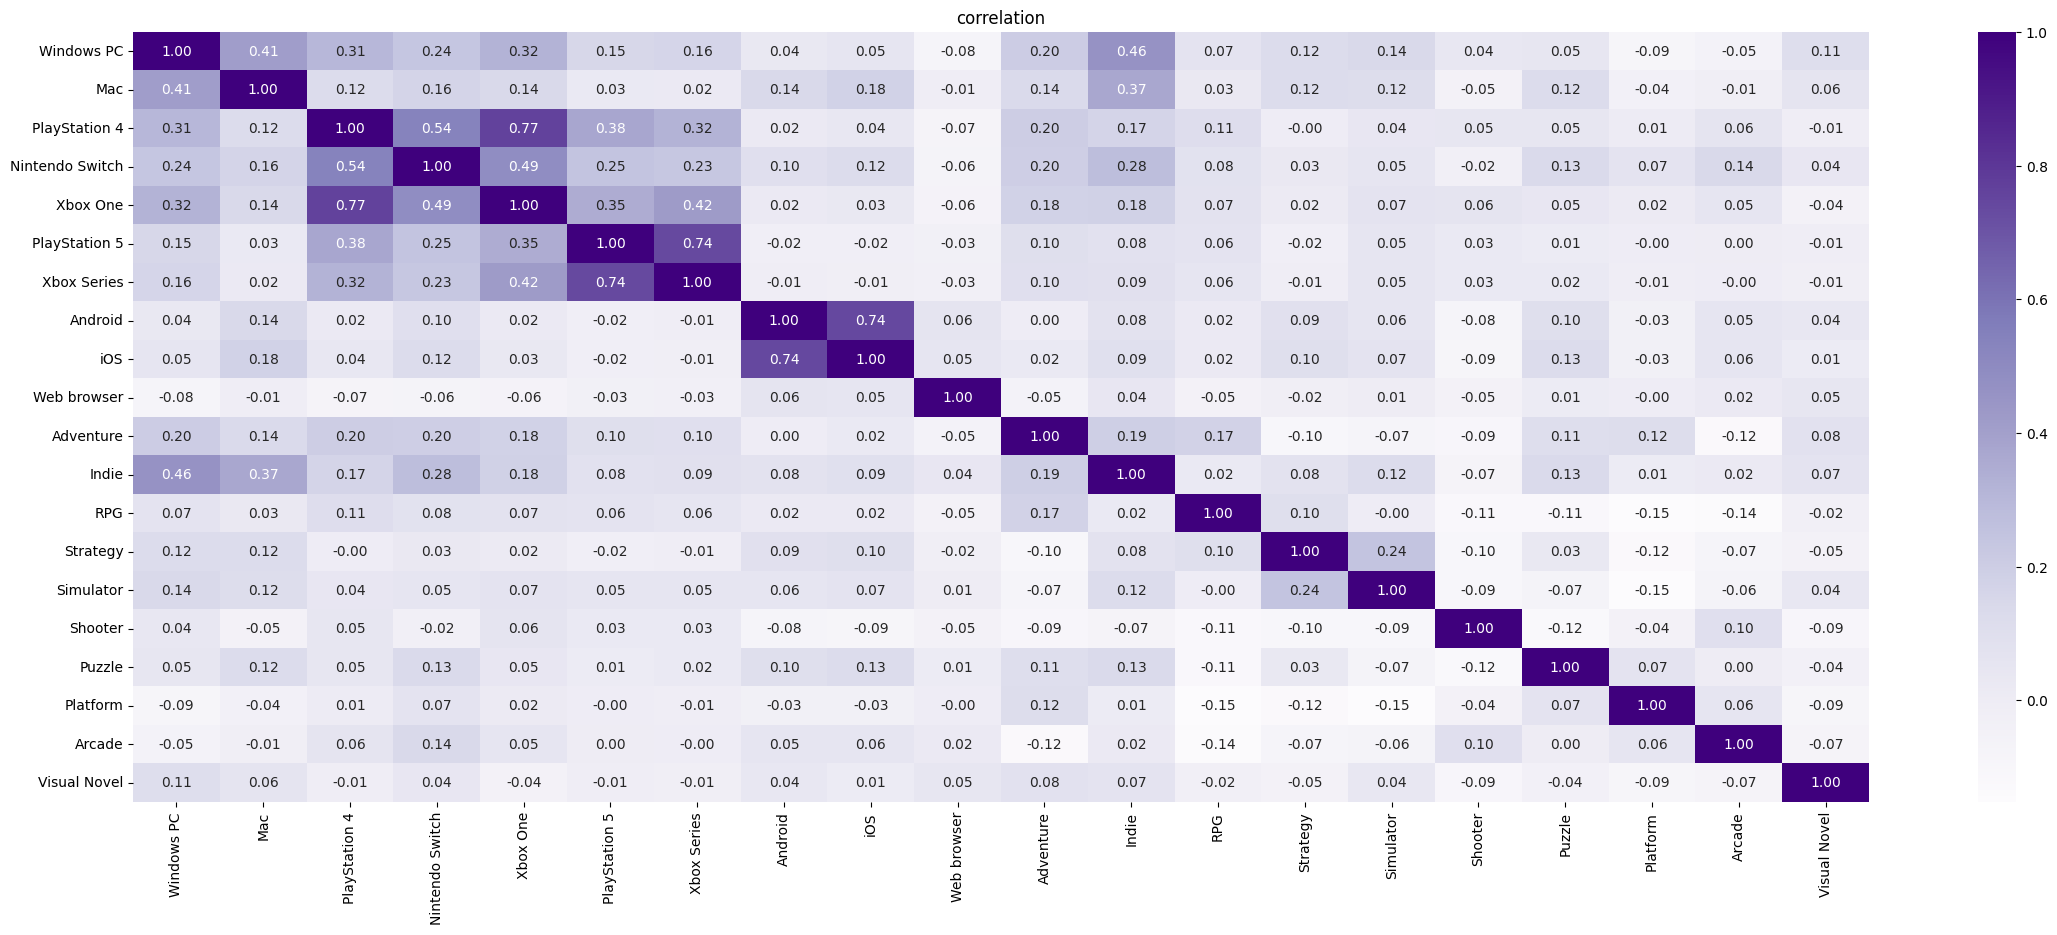

In [33]:
fig, ax = plt.subplots(figsize=(28, 10))
sns.heatmap(merged_game_fin.corr(numeric_only = True), annot = True, cmap = 'Purples',fmt='.2f')
plt.gca().set_title('correlation')
plt.show()

In [34]:
from scipy.stats import chi2_contingency


contingency_table = pd.crosstab(merged_game_fin['Windows PC'], merged_game_fin['Adventure'])


chi2, p, _, _ = chi2_contingency(contingency_table)


print(f"\nChi-squared Statistic: {chi2}")
print(f"P-value: {p}")


alpha = 0.05
if p < alpha:
    print("Variable 1 and variable 2 are related")
else:
    print("Variable 1 and variable 2 aren't related")


Chi-squared Statistic: 869.0202067705013
P-value: 5.3282742515342993e-191
Variable 1 and variable 2 are related


In [35]:

contingency_table = pd.crosstab(merged_game_fin['Windows PC'], merged_game_fin['Indie'])

chi2, p, _, _ = chi2_contingency(contingency_table)

print(f"\nChi-squared Statistic: {chi2}")
print(f"P-value: {p}")

alpha = 0.05
if p < alpha:
    print("Variable 1 and variable 2 are related")
else:
    print("Variable 1 and variable 2 aren't related")


Chi-squared Statistic: 4416.295197848036
P-value: 0.0
Variable 1 and variable 2 are related


In [31]:
sample_in = merged_game_fin['Indie']
sample_pc = merged_game_fin['Windows PC']
sample_ns = merged_game_fin['Nintendo Switch']
sample_mac= merged_game_fin['Mac']
sample_ad = merged_game_fin['Adventure']
sample_ps4 =merged_game_fin['PlayStation 4']

In [36]:
from scipy.stats import spearmanr

corr, p_value = spearmanr(sample_ad, sample_pc)

print(f"Spearman Rank Correlation: {corr}")
print(f"P-value: {p_value}")


alpha = 0.05
if p_value < alpha:
    print("Significant monotonic relationship")
else:
    print("No significant monotonic relationship")

Spearman Rank Correlation: 0.20412163667504693
P-value: 3.2813499268095234e-195
Significant monotonic relationship


In [37]:
corr, p_value = spearmanr(sample_in, sample_pc)

print(f"Spearman Rank Correlation: {corr}")
print(f"P-value: {p_value}")


alpha = 0.05
if p_value < alpha:
    print("Significant monotonic relationship")
else:
    print("No significant monotonic relationship")

Spearman Rank Correlation: 0.46004497456271454
P-value: 0.0
Significant monotonic relationship


In [38]:
corr, p_value = spearmanr(sample_in, sample_ns)

print(f"Spearman Rank Correlation: {corr}")
print(f"P-value: {p_value}")


alpha = 0.05
if p_value < alpha:
    print("Significant monotonic relationship")
else:
    print("No significant monotonic relationship")

Spearman Rank Correlation: 0.27957181619168125
P-value: 0.0
Significant monotonic relationship


In [39]:
corr, p_value = spearmanr(sample_in, sample_mac)

print(f"Spearman Rank Correlation: {corr}")
print(f"P-value: {p_value}")


alpha = 0.05
if p_value < alpha:
    print("Significant monotonic relationship")
else:
    print("No significant monotonic relationship")

Spearman Rank Correlation: 0.3715535106788149
P-value: 0.0
Significant monotonic relationship


In [40]:
corr, p_value = spearmanr(sample_ad, sample_ns)

print(f"Spearman Rank Correlation: {corr}")
print(f"P-value: {p_value}")

alpha = 0.05
if p_value < alpha:
    print("Significant monotonic relationship")
else:
    print("No significant monotonic relationship")

Spearman Rank Correlation: 0.1988079836725266
P-value: 4.398545491960225e-185
Significant monotonic relationship


In [42]:
corr, p_value = spearmanr(sample_ad, sample_ps4)

print(f"Spearman Rank Correlation: {corr}")
print(f"P-value: {p_value}")

alpha = 0.05
if p_value < alpha:
    print("Significant monotonic relationship")
else:
    print("No significant monotonic relationship")

Spearman Rank Correlation: 0.2032991852379155
P-value: 1.2661377399392924e-193
Significant monotonic relationship
